In [26]:
#Importing the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#uploading the csv file:
df=pd.read_csv('placement.csv')

In [28]:
#To get an overview of data:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [29]:
#               STEPS Involved:
#1. preprocessing + EDA {Exploratory Data Analysis} + Feature selection
#2. Extract input and output columns.
#3. Scale the values
#4. Train test split
#5. Train the model
#6. Evaluate the model / Model selection
#7. Deploy the model

In [30]:
#1.                 Preprcessing:
#check for any null values:
df.info()
#no null values are there.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [31]:
df=df.iloc[:,1:]
df
#we removed the unnamed column because it was of no use to us.

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


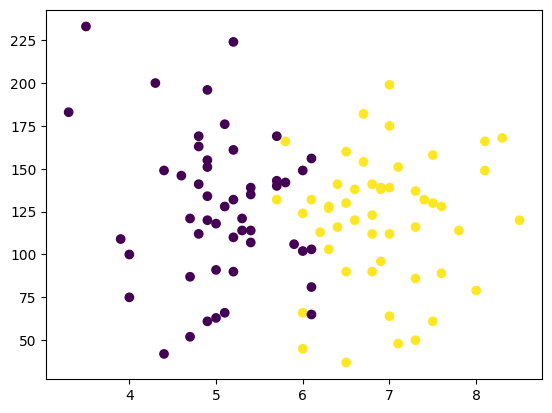

In [32]:
#                       EDA{exploratory data analysis}
plt.scatter(x=df['cgpa'],
            y=df['iq'],
            c=df["placement"]
            )

In [33]:
#               Feature selection:
# No need for feature selection here as we need all the 3 columns
# for making the model

In [34]:
#Step 2: Extract the input and output columns:
x=df.iloc[:,0:2]    #x will be independent variable
y=df["placement"]   #y will be dependent variable
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [35]:
#Step4:           train , test , split;

from sklearn.model_selection import train_test_split

#train_test_split(dependent variable, independent variable , test_size)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) #0.1 means 10/100 rows

In [36]:
#Step3:                     Scaling:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [37]:
x_train=scaler.fit_transform(x_train)

In [38]:
x_test= scaler.transform(x_test)
x_test

array([[-0.50581485,  0.42584166],
       [-2.22538423,  2.8053796 ],
       [ 1.39476183,  0.19801356],
       [ 2.11879104,  1.15995443],
       [-0.68682215, -0.81455578],
       [-0.77732581,  0.14738509],
       [ 0.85173992,  0.40052743],
       [ 0.94224357, -0.25764264],
       [ 0.58022897,  0.40052743],
       [ 1.21375453, -0.91581271]])

In [39]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [40]:
#                       Model Training:
clf.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [41]:
 #              evaluate the model:
y_pred=clf.predict(x_test)

<Axes: >

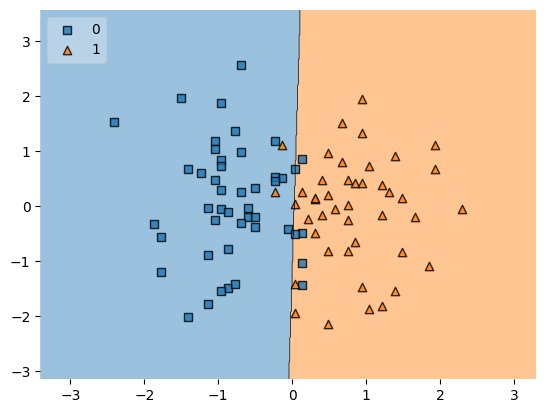

In [42]:
#To visualize the sorting done by model

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [43]:
#To check accuracy of the model:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [44]:
import pickle   #convert py obect to file
pickle.dump(clf,
            open('model.pkl','wb')) #file name, WB(write binary mode)
